##### 부산시 구군별 인구데이터 불러오기

In [2]:
import pandas as pd

In [3]:
gugun_pop = pd.read_excel('./data/부산광역시_전체_세대.xlsx',header=1,usecols=[0,17,18,19,20,21,22,23,24])

g:\DEV\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
gugun_pop.columns

Index(['구·군별', '읍면동수 (개).2', '세대수 (세대).2', '인구수  (명).2', '남자인구수 (명).2',
       '여자인구수 (명).2', '시전체 인구에 대한 구성비 (%).2', '면적 (㎢).2', '인구밀도 (명/㎢).2'],
      dtype='object')

In [5]:
## 필요 칼럼만 뽑아내기
gugun_pop = gugun_pop[['구·군별','면적 (㎢).2','인구수  (명).2']]


In [6]:
# 열 이름 변경하기
gugun_pop = gugun_pop.rename(columns={'구·군별': '구군명'})
gugun_pop = gugun_pop.rename(columns={'면적 (㎢).2': '면적'})
gugun_pop = gugun_pop.rename(columns={'인구수  (명).2':'인구수'})

In [7]:
gugun_pop.head()

,구군명,면적,인구수
0,부산광역시,771.33,3348011
1,중구,3.01,41103
2,서구,13.98,106500
3,동구,10.12,90028
4,영도구,14.20,108959


In [8]:
## 저장하기
gugun_pop.to_excel('./data/부산광역시_구군명_데이터_전처리.xlsx',index=False)

In [9]:
## 행정기관 갯수 데이터 읽어와서 합치기
admi = pd.read_excel('./data/구군별_행정기관갯수.xlsx')

In [10]:
df_data = pd.merge(left = gugun_pop,right=admi,how='left',on='구군명')

## 이상하지만 API 데이터에 동구 데이터는 없기에 삭제하고 진행

In [11]:
#count가 Nan값인 행들 삭제

df_data = df_data[df_data['count'].isnull() != True]

In [12]:
# 열 이름 변경하기
df_data = df_data.rename(columns={'count': '행정공공기관갯수'})

In [13]:
## 행정공공기관갯수 int타입으로 변환하기
df_data['행정공공기관갯수'] = df_data['행정공공기관갯수'].astype('Int64')

In [14]:
df_data.head()

,구군명,면적,인구수,행정공공기관갯수
1,중구,3.01,41103,18
2,서구,13.98,106500,15
4,영도구,14.20,108959,18
5,부산진구,29.67,363092,21
6,동래구,16.63,271164,14


##### 구군의 위, 경도 넣기

In [15]:
## 전국 시군구 위경도 데이터 로드
df_korea = pd.read_excel('./data/전국_시군구_행정구역.xlsx',usecols=[1,2,3,4])

In [16]:
df_korea.head()

,do,city,longitude,latitude
0,강원,강릉시,128.878497,37.749136
1,강원,고성군,128.470164,38.377961
2,강원,동해시,129.116633,37.521931
3,강원,삼척시,129.167489,37.447086
4,강원,속초시,128.594167,38.204275


In [17]:
df_busan = df_korea[df_korea['do'] == '부산시']

In [18]:
df_busan = df_busan[['city','longitude','latitude']]

In [19]:
df_busan

,city,longitude,latitude
122,강서구,128.901900,35.154330
123,금정구,129.094319,35.240078
124,남구,129.086500,35.133408
125,동구,129.059175,35.135894
126,동래구,129.085856,35.201872
127,부산진구,129.055319,35.159953
128,북구,129.025488,35.229381
129,사상구,128.993333,35.149467
130,사하구,128.977042,35.101428
131,서구,129.014100,35.103220


In [20]:
final_busan_data = pd.merge(left=df_data,right=df_busan,left_on='구군명',right_on='city',how='left').drop(['city'],axis=1)

In [21]:
final_busan_data

,구군명,면적,인구수,행정공공기관갯수,longitude,latitude
0,중구,3.01,41103,18,129.034508,35.103217
1,서구,13.98,106500,15,129.014100,35.103220
2,영도구,14.20,108959,18,129.065300,35.078920
3,부산진구,29.67,363092,21,129.055319,35.159953
4,동래구,16.63,271164,14,129.085856,35.201872
5,남구,26.82,261011,20,129.086500,35.133408
6,북구,39.37,275137,13,129.025488,35.229381
7,해운대구,51.54,385015,26,129.147800,35.179080
8,사하구,41.78,302178,39,128.977042,35.101428
9,금정구,65.28,219268,54,129.094319,35.240078


##### 시각화


##### 차트 그리기

In [33]:
from matplotlib import rcParams,font_manager,rc
import matplotlib.pyplot as plt
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

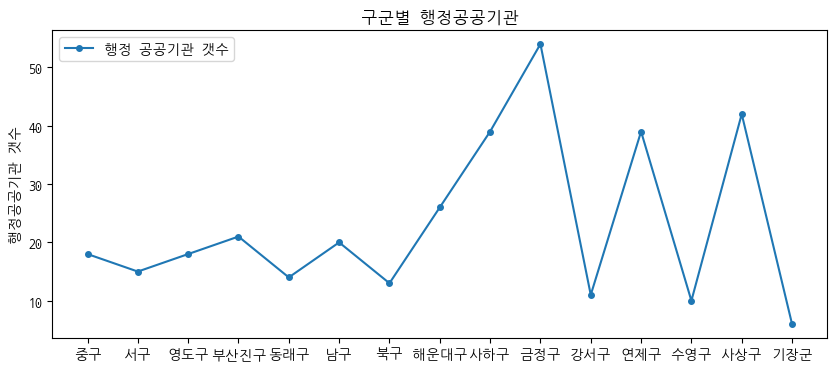

In [39]:
plt.figure(figsize=(10,4))
plt.plot(df_data['구군명'],df_data['행정공공기관갯수'],label='행정 공공기관 갯수',marker='o',markersize= 4)
plt.title('구군별 행정공공기관')
plt.legend(loc='upper left')
plt.ylabel('행정공공기관 갯수',)

plt.show()


##### 지도

In [22]:
import json
import folium

In [23]:
busan_geo = json.load(open('./data/busan_gu.json',encoding='utf-8'))

In [24]:
from folium.features import DivIcon

In [25]:
busan_loc = [35.1856505,129.1]
map = folium.Map(location=busan_loc,zoom_start=11)
folium.GeoJson(busan_geo).add_to(map)
folium.Choropleth(geo_data=busan_geo,data=final_busan_data,columns=['구군명','행정공공기관갯수'],
                  legend_name='구군별 행정공공기관갯수',
                  fill_color='YlGnBu',fill_opacity=0.7,line_opacity=0.5,key_on='properties.name').add_to(map)

for idx in final_busan_data.index:
    lat = final_busan_data.loc[idx,'latitude']
    lng = final_busan_data.loc[idx,'longitude']
    count = final_busan_data.loc[idx,'행정공공기관갯수']
    gu = final_busan_data.loc[idx,'구군명']
    folium.Marker(location=(lat,lng),icon=DivIcon(
        icon_size = (150,60),
        icon_anchor = (75,25),
        html = f'''
        <div style="font-size: 9pt; font-weight: bold; color:black;text-align: center;">
        {gu} <br> {count}개
        </div>
        '''
    )).add_to(map)
map

In [27]:
busan_loc = [35.1856505,129.1]
map = folium.Map(location=busan_loc,zoom_start=11)
folium.GeoJson(busan_geo).add_to(map)
folium.Choropleth(geo_data=busan_geo,data=final_busan_data,columns=['구군명','인구수'],
                  legend_name='구군별 인구수',
                  fill_color='YlGnBu',fill_opacity=0.7,line_opacity=0.5,key_on='properties.name').add_to(map)

for idx in final_busan_data.index:
    lat = final_busan_data.loc[idx,'latitude']
    lng = final_busan_data.loc[idx,'longitude']
    count = final_busan_data.loc[idx,'인구수']
    gu = final_busan_data.loc[idx,'구군명']
    folium.Marker(location=(lat,lng),icon=DivIcon(
        icon_size = (150,60),
        icon_anchor = (75,25),
        html = f'''
        <div style="font-size: 9pt; font-weight: bold; color:black;text-align: center;">
        {gu} <br> {count}명
        </div>
        '''
    )).add_to(map)
map

##### 결론
- 데이터가 결함이 없다는 전제 하에, 인구수와 공공행정기관 수는 크게 연관이 있어보이지는 않는다.